### Logistic Loss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def logistic_loss(y_true, y_pred):
  epsilon = 1e-15  # To prevent numerical instability (log(0))
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon) 
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [19]:
# Sample data
np.random.seed(0)
X = np.random.randn(100, 1)  # Sample features
y = np.random.randint(0, 2, 100)  # Sample labels (0 or 1)

In [21]:
# Example: Calculate predicted probabilities (replace with your model)
weights = np.random.randn(1)  # Example weights
predicted_probabilities = 1 / (1 + np.exp(-np.dot(X, weights)))

In [23]:
loss = logistic_loss(y, predicted_probabilities)
print("Logistic Loss:", loss)

Logistic Loss: 0.7595246077889353


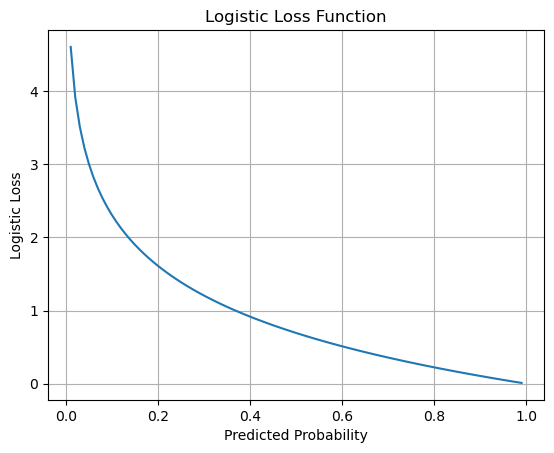

In [25]:
# Create a range of predicted probabilities
y_pred_range = np.linspace(0.01, 0.99, 100)

# Calculate loss for different predicted probabilities 
loss_values = []
for prob in y_pred_range:
    loss_values.append(logistic_loss(1, prob))  # Example: True label is 1

# Plot the loss curve
plt.plot(y_pred_range, loss_values)
plt.xlabel("Predicted Probability")
plt.ylabel("Logistic Loss")
plt.title("Logistic Loss Function")
plt.grid(True)
plt.show()

### Logistic Regression Dataset and Decision Boundary

Cost: 0.7988534580719397


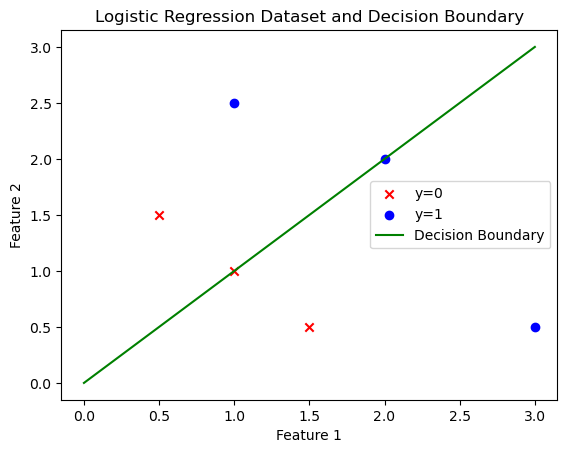

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        z = np.dot(X[i], w) + b
        f_wb = sigmoid(z)
        cost += -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
    cost /= m
    return cost

# Given datasets
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Example weights and bias
w = np.array([1, -1])  # Example weights
b = 0                  # Example bias

# Compute cost
cost = compute_cost(X_train, y_train, w, b)
print(f"Cost: {cost}")

# Plot dataset
fig, ax = plt.subplots()
for i in range(len(y_train)):
    if y_train[i] == 0:
        ax.scatter(X_train[i, 0], X_train[i, 1], color='red', marker='x', label='y=0' if i == 0 else "")
    else:
        ax.scatter(X_train[i, 0], X_train[i, 1], color='blue', marker='o', label='y=1' if i == 3 else "")

# Decision boundary plot
x_vals = np.linspace(0, 3, 100)
y_vals = (b - w[0] * x_vals) / w[1]
ax.plot(x_vals, y_vals, color='green', label='Decision Boundary')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.title("Logistic Regression Dataset and Decision Boundary")
plt.show()


### Gradient descent in logistic regression

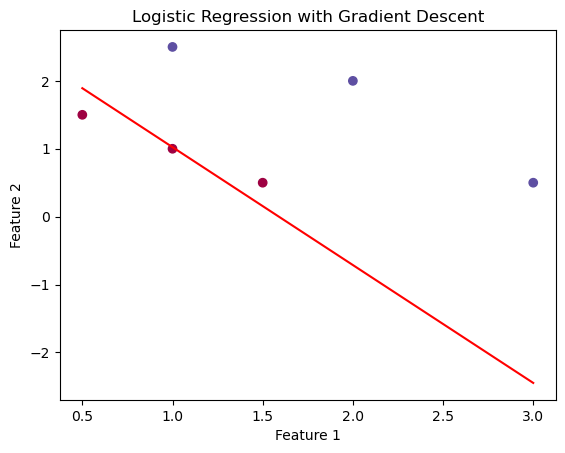

Final Weights: [-0.95206547  0.59894355  0.34493598]
Accuracy: 0.8333333333333334


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

# Add bias term (intercept)
X_train = np.c_[np.ones(X_train.shape[0]), X_train] 

# Initialize parameters
learning_rate = 0.01
num_iterations = 1000
weights = np.zeros(X_train.shape[1]) 

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
for i in range(num_iterations):
    # Predict probabilities
    y_pred = sigmoid(np.dot(X_train, weights))

    # Calculate error
    error = y_pred - y_train

    # Update weights
    gradient = np.dot(X_train.T, error) / len(y_train)
    weights -= learning_rate * gradient

# Make predictions on training data
y_pred_final = sigmoid(np.dot(X_train, weights))

# Plot the decision boundary (if 2D)
if X_train.shape[1] == 3: 
    plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap=plt.cm.Spectral)
    x_values = np.linspace(np.min(X_train[:, 1]), np.max(X_train[:, 1]), 100)
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.plot(x_values, y_values, 'r-')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression with Gradient Descent')
    plt.show()

print("Final Weights:", weights)
print("Accuracy:", np.mean(np.round(y_pred_final) == y_train))

### Logistic Regression using Scikit-Learn

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample dataset (replace with your actual data)
X = [[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]
y = [0, 0, 0, 1, 1, 1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the model's accuracy on test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print predictions on training set
print("Predictions on Training Set:", y_train_pred)

Training Accuracy: 0.75
Test Accuracy: 0.0
Predictions on Training Set: [1 1 1 1]
